## Read Data

In [24]:
import pandas as pd
import numpy as np

customerData = pd.read_csv("car_purchasing.csv", encoding='gbk')
customerData.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


### Remove rows with Null data

In [25]:
customerData.dropna(inplace=True)
customerData.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [26]:
# Number of unique countries in customer data
customerData['country'].nunique()

211

In [27]:
customerData.groupby(['country']).size().sort_values()

country
Cook Islands                      1
United Kingdom (Great Britain)    1
Saint Lucia                       1
Ukraine                           1
South Sudan                       1
                                 ..
Saint Barth閘emy                   5
Guinea                            5
Mauritania                        6
Bolivia                           6
Israel                            6
Length: 211, dtype: int64

Because the country with the most records has only 6 records, the country should not be used in the linear regression model. There are not enough records to prove a correlation. 

## Visualizing Data

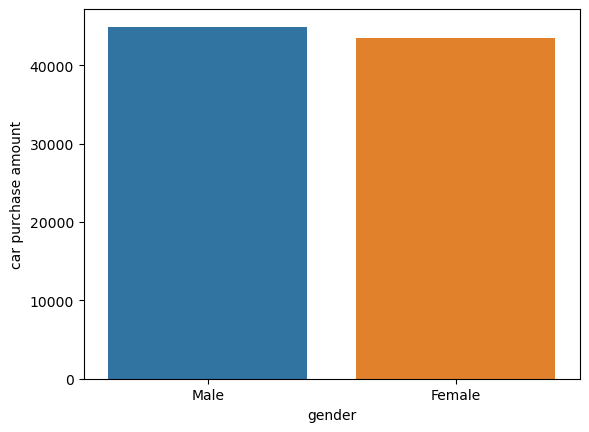

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

df2 = customerData.groupby(['gender'])
carPurchaseAmountSeries = df2['car purchase amount'].mean().to_frame(name='car purchase amount')
genderSeries = pd.Series(data=['Male', 'Female']).to_frame(name='gender')
df2 = pd.concat([genderSeries, carPurchaseAmountSeries], axis=1)

sns.barplot(data=df2, x='gender', y='car purchase amount')
plt.show()

In [29]:
maleAverageCarPurchase = carPurchaseAmountSeries['car purchase amount'][0]
femaleAverageCarPurchase = carPurchaseAmountSeries['car purchase amount'][1]

# Difference in percentage between male and female average car purchase amount
(maleAverageCarPurchase - femaleAverageCarPurchase) / maleAverageCarPurchase * 100

3.1814191941891043

Because the difference between the male and female average car purchase amount is only 3%, gender does not have a strong correlation with car purchase amount.

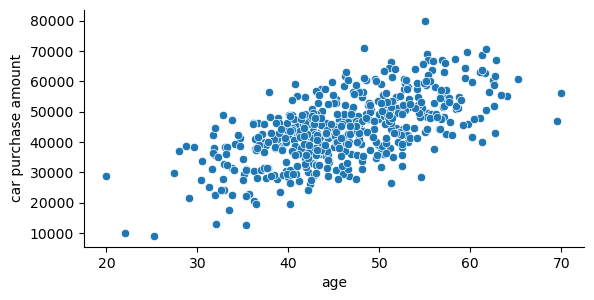

In [30]:
sns.pairplot(customerData, x_vars='age', y_vars='car purchase amount', height=3, aspect=2, kind='scatter')
plt.show()

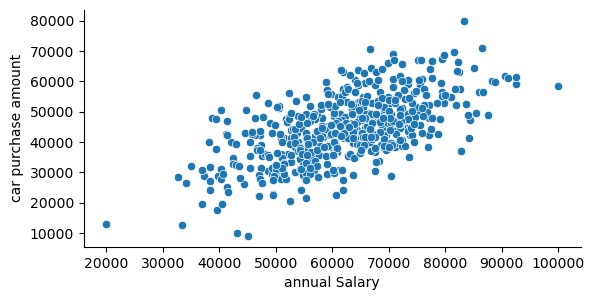

In [31]:
sns.pairplot(customerData, x_vars='annual Salary', y_vars='car purchase amount', height=3, aspect=2, kind='scatter')
plt.show()

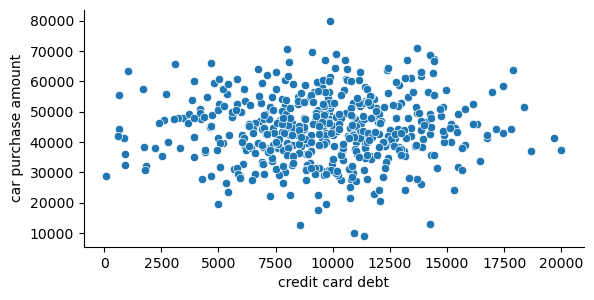

In [32]:
sns.pairplot(customerData, x_vars='credit card debt', y_vars='car purchase amount', height=3, aspect=2, kind='scatter')
plt.show()

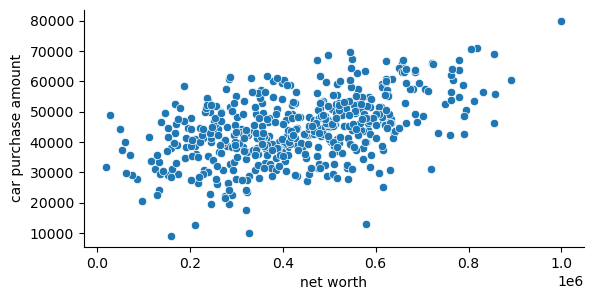

In [33]:
sns.pairplot(customerData, x_vars='net worth', y_vars='car purchase amount', height=3, aspect=2, kind='scatter')
plt.show()

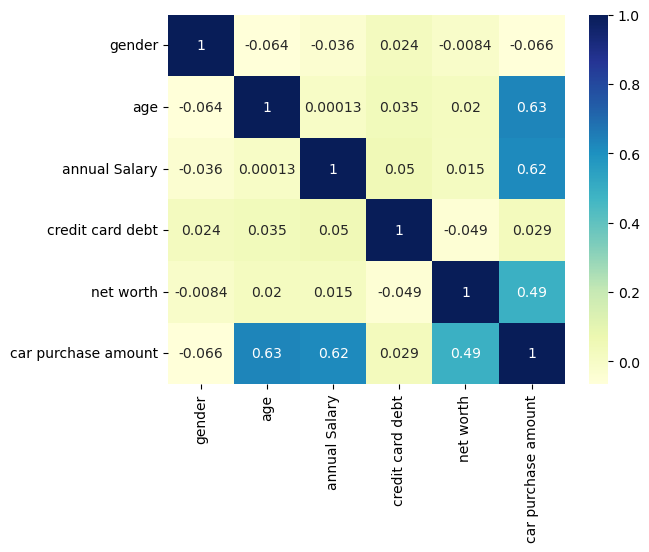

In [34]:
sns.heatmap(customerData.corr(), cmap="YlGnBu", annot=True)
plt.show()

## Linear Regression

In [35]:
x = customerData[['age', 'annual Salary', 'net worth']]
y = customerData['car purchase amount']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=100)

### Train and test linear regression model

In [36]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()  
mlr.fit(x_train, y_train)

y_pred_mlr= mlr.predict(x_test)
mlr_diff = pd.DataFrame({'Actual car budget': y_test, 'Predicted car buget': y_pred_mlr})
mlr_diff.head()

,Actual car budget,Predicted car buget
69,49392.88970,49391.800331
29,43994.35972,43991.917976
471,48052.65091,48052.887001
344,35659.12237,35660.044928
54,31978.97990,31979.594106


In [37]:
mlr.intercept_

-42147.75122239636

In [38]:
mlr.coef_

array([8.41567194e+02, 5.62337245e-01, 2.89835148e-02])

## Formula for predicting customer car budget:
**Car budget** = -42147.75122239636 + 841.567194 * **Age** + 0.562337245 * **Annual Salary** + 0.0289835148 * **Net Worth**

In [39]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x, y) * 100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 100.00
Mean Absolute Error: 1.3439793444353199
Mean Square Error: 2.783782456669564
Root Mean Square Error: 1.6684670978684488


## Using the model

In [40]:
# Change age, annualSalary, and netWorth to the values you want to use to predict the car budget

age = 25
annualSalary = 75000
netWorth = 10000
df = pd.DataFrame(data={'age': [age], 'annual Salary': [annualSalary], 'net worth': [netWorth]})
mlr.predict(df)

array([21356.55712937])